<a href="https://colab.research.google.com/github/parth1614/QuantumComputing-Qiskit/blob/main/CNOT_gate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install qiskit

     |████████████████████████████████| 6.5 MB 4.6 MB/s 
     |████████████████████████████████| 18.0 MB 87 kB/s 
     |████████████████████████████████| 238 kB 35.7 MB/s 
     |████████████████████████████████| 200 kB 72.6 MB/s 
     |████████████████████████████████| 54 kB 2.5 MB/s 
     |████████████████████████████████| 1.6 MB 46.0 MB/s 
     |████████████████████████████████| 943 kB 51.4 MB/s 
     |████████████████████████████████| 49 kB 4.8 MB/s 
     |████████████████████████████████| 37.5 MB 39 kB/s 
     |████████████████████████████████| 38.1 MB 120 kB/s 
     |████████████████████████████████| 49 kB 4.1 MB/s 
     |████████████████████████████████| 3.6 MB 51.4 MB/s 
     |████████████████████████████████| 113 kB 53.2 MB/s 
  Created wheel for qiskit: filename=qiskit-0.34.2-py3-none-any.whl size=11805 sha256=86bf40597bf6a339a290906585d04d02b59ae72f513308d837421b64aa1ea56b
  Stored in directory: /root/.cache/pip/wheels/62/77/65/cda6eedfdd2a525bd3f479a4386930ae3088a1eb01f8c944

In [3]:
from qiskit import QuantumCircuit, assemble, Aer

In [4]:
from qiskit.visualization import plot_histogram

**Encoding The Input**


In [5]:
##Using the Bit-Flip gate as 'NOT' gate of classical
qc = QuantumCircuit(8)

##We bit-flipped the 7th bit
qc.x(7)

In [6]:
!pip install pylatexenc

     |████████████████████████████████| 162 kB 5.2 MB/s 
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136835 sha256=1a9f16a6b036def16b4542707665be45c7324ae1e80499ada536db9e97025179
  Stored in directory: /root/.cache/pip/wheels/f1/8a/f5/33ee79d4473eb201b519fa40f989b842e373237395a3421f52
Successfully built pylatexenc


In [7]:
qc.draw()

q_0: ─────
          
q_1: ─────
          
q_2: ─────
          
q_3: ─────
          
q_4: ─────
          
q_5: ─────
          
q_6: ─────
     ┌───┐
q_7: ┤ X ├
     └───┘

In [8]:
qc.measure_all()
qc.draw(initial_state=True)

░ ┌─┐                     
  q_0: |0>──────░─┤M├─────────────────────
                ░ └╥┘┌─┐                  
  q_1: |0>──────░──╫─┤M├──────────────────
                ░  ║ └╥┘┌─┐               
  q_2: |0>──────░──╫──╫─┤M├───────────────
                ░  ║  ║ └╥┘┌─┐            
  q_3: |0>──────░──╫──╫──╫─┤M├────────────
                ░  ║  ║  ║ └╥┘┌─┐         
  q_4: |0>──────░──╫──╫──╫──╫─┤M├─────────
                ░  ║  ║  ║  ║ └╥┘┌─┐      
  q_5: |0>──────░──╫──╫──╫──╫──╫─┤M├──────
                ░  ║  ║  ║  ║  ║ └╥┘┌─┐   
  q_6: |0>──────░──╫──╫──╫──╫──╫──╫─┤M├───
          ┌───┐ ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
  q_7: |0>┤ X ├─░──╫──╫──╫──╫──╫──╫──╫─┤M├
          └───┘ ░  ║  ║  ║  ║  ║  ║  ║ └╥┘
meas: 0 8/═════════╩══╩══╩══╩══╩══╩══╩══╩═
                   0  1  2  3  4  5  6  7

In [9]:
simul = Aer.get_backend('aer_simulator')

In [10]:
result = simul.run(qc, validate=True).result()

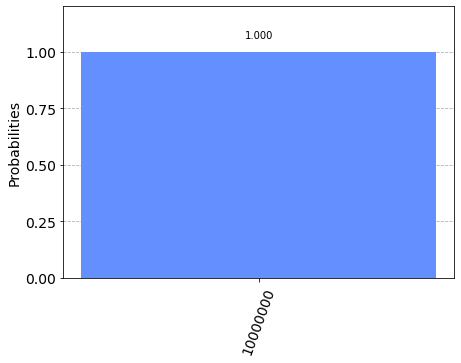

In [11]:
counts = result.get_counts()
plot_histogram(counts)

The output value 1 comes from the 7th qubit, as we had applied the bit-flip gate at the 7th qubit itself, and initially the values of all qubits are zero.

In [12]:
##Using the CNOT gate to extract the output i.e. to check wheather the bits are different or the same
qc_cnot = QuantumCircuit(2)

##the CNOT gate is applied to the 2 qubits
qc_cnot.cx(0,1)
qc_cnot.draw()

q_0: ──■──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘

Here, q_0 is the control bit, and q_1 is the target bit

In [13]:
qc_cnot1 = QuantumCircuit(2,2)
qc_cnot1.x(0)
qc_cnot1.cx(0,1)
qc_cnot1.measure_all(1,1)
qc_cnot1.measure_all(0,0)
qc_cnot1.draw()

┌───┐      ░ ┌─┐   
   q_0: ┤ X ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
   c: 2/══════════════╬══╬═
                      ║  ║ 
meas: 2/══════════════╩══╩═
                      0  1

Input (q1 q0)	Output (q1 q0)

            00	00
            01	11
            10	10
            11	01

The Output is 1 1, as q0 = 1 because we had initially introduced a bit flip operaor
 and q1 = 0